**Background:**
Counter Strike: Global Offensive is a video game in which teams of 5 compete to win matches that consist of 30 individual rounds. The players are split into two teams of “Terrorist” and “Counter-Terrorist”, in which the Terrorist team can win by detonating a bomb at one of two ‘sites’ or eliminating all of the other team, and Counter-Terrorists can win by defusing the terrorists’ bomb or eliminating all of the other team. Games are split into two halves of 15 rounds each, and each team spends one half as the Terrorists and one half as the Counter-Terrorists. 

At the end of each round, each player is rewarded a certain amount of in-game money based on their actions in the round (kills, planting the bomb, etc), the winning team of the round, and the results of the preceding rounds (for example: losing your fifth round in a row will grant the losing team \$3400 per player, where as losing only one round will grant each player just \$1400). This money is then used in the next round to purchase equipment (weapons, grenades, armor, etc). As the game progresses, teams can afford stronger weapons and more grenades/armor. Each teams buying strategies at the beginning of a round are categorized as follows:

  -Pistol Round - The first round of each half where each team has only $800 per player and can not afford to buy anything stronger than a pistol or grenades.

  -Eco Round/Semi-Eco Round - When one team does not have enough money for a full buy and chooses to save most or all of their cash in the hopes of going into the following rounds with a better economy in which they can buy full loadouts. 
  
  -Force Buy - When one team does not have enough money for a full buy and chooses to spend it all on whatever they can afford. This will usually consist of them buying only the cheaper, less powerful rifles or SMGs. T

  -Full Buy/Normal Buy - When a team has enough money to afford the ‘best’ weapons and does not go out of their way to save for future rounds.
  
This analysis will look at some trends within Counter Strike matches as well as analyze the effects of using different weapons at different ranges and how the in-game economy and buying patterns influence the outcome of rounds/games.




# Getting Started

In implemented this data analysis, we used Python 3 with some important libraries such as pandas (for managing data), numpy (for working with numbers), and matplotlib (for representing data visually).

In [226]:
############### MODULES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import warnings
warnings.filterwarnings('ignore')
import random

# Tidying the Data

For this project we are working with Kevin Pei's *CS:GO Competitive Matchmaking Data* database.

[Data Set](https://www.kaggle.com/skihikingkevin/csgo-matchmaking-damage)

[Kevin Pei](https://kpei.me/blog/)

 This data set, alongside other things, contains records of over 1000 public matches of various skill levels showing second-by-second recordings of different games with numbers on damage dealt, player positions, grenades thrown, bombs planted, etc. It also contains data on various maps of Counter Strike with their dimensions and rendeings of these maps from a birds' eye view. This will be useful in visualizing positional data.
 
 Firstly, we need to process our data into our local environment. To do this, we'll use pandas to read the data from the csv files and store it as dataframes. This will give us our data in an easily accessable form to aid in our future manipulation and analysis.

In [227]:
df = pd.read_csv("data/CSVs/mm_master_demos.csv")

mapdf = pd.read_csv("data/CSVs/map_data.csv")

grenadedf = pd.read_csv("data/CSVs/mm_grenades_demos.csv")

After processing the data, we need to tidy it up by renaming certain columns to be more easily interpretable and dropping other columns that we won't need for future analysis. While tracking variables like armor damage or which site the bomb is planted at could be useful in other projects using this dataset, it is unnecessary for our purposes and simply takes up space.

In [228]:
#rename columns for clarity and drop unnecessary data
df.rename(columns = {'file': 'match_no'}, inplace = 'true')
df.drop(columns=['date', 'tick', 'award', 'vic_side', 'arm_dmg', 'is_bomb_planted', 'bomb_site', 'award', 'att_rank'])

#rename columns for clarity and drop unnecessary data
mapdf.drop(columns = ['ResX', 'ResY'])
mapdf.rename(columns = {'Unnamed: 0': 'map'}, inplace=True)

#rename columns for clarity and drop unnecessary data
grenadedf.drop(columns = ['hitbox', 'ct_eq_val', 't_eq_val', 'is_bomb_planted', 'arm_dmg', 'hp_dmg', 'winner_team', 'winner_side', 'att_rank', 'vic_rank', 'vic_pos_x', 'vic_pos_y', 'round_type', 'ct_eq_val', 't_eq_val', 'round', 'start_seconds', 'vic_id', 'vic_side', 'bomb_site', 'att_team', 'vic_team', 'end_seconds', 'att_id', 'seconds'], inplace = True)


Next, we implement a new column that tracks whether the team with more expensive equipment in a certain round is the winner of that round. This will be useful in analysis later.

In [229]:
#check to see whether the winning team of each 
#round was also the team who spent the most $ 
#save to new column
df['higher_wins'] = False
for index, row in df.iterrows():
  if (((row['winner_side'] == 'CounterTerrorist') and (row['ct_eq_val'] > row['t_eq_val'])) or ((row['winner_side'] == 'Terrorist') and (row['t_eq_val'] > row['ct_eq_val']))):
    df.at[index, 'higher_wins'] = True


# Exploratory Data Analysis

To begin with our analysis, we try to uncover certain trends within the data that could reveal insights into the behaviors of players within Counter Strike. Thanks to the comprehensive map and player positioning data, we can visualize some of our data in a way that is very easily interpretable. 

For our first positional analysis, we will simply visualize all damage dealt and received over the course of one random match from our dataset. The **blue circles** will represent someone dealing damage, and the **red circles** will represent someone recieving damage. Below is a representation of that on the fan-favorite map, *Dust 2*.

To do this, we will first load the background map as provided by the dataset. Next, we will pick a random game from the dataframe and create a new dataframe that contains only the incidents of damage from that match. Next we will use matplotlib to create a scatter plot from the position information included in our new dataframe and the map-specific coordinate boundaries from the map dataset.

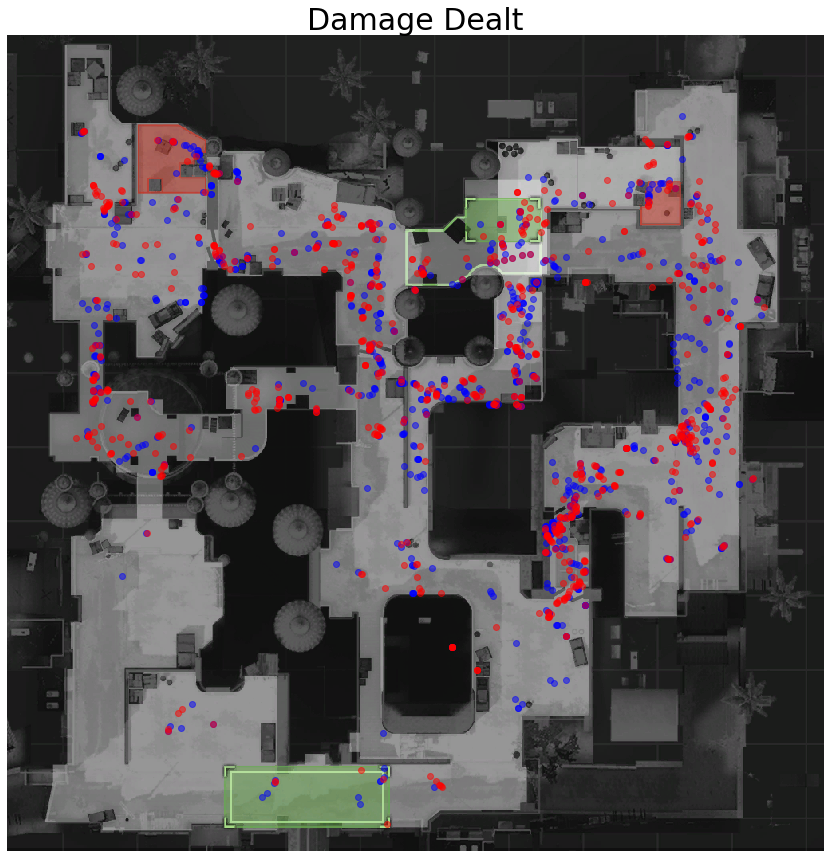

In [230]:
map_input = "de_dust2"
bg = imread(f'data/maps/{map_input}.png')

#select random game from dust2 and create matching dataframe
match = random.choice(list(df.loc[(df.map == map_input)].groupby('match_no').groups.keys()))
plot_df = df.loc[(df.match_no == match)] 

#find map coordinate data from map dataframe
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create matplotplib graph and overlay over background image
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.5, c='blue')
plt.scatter(plot_df['vic_pos_x'] + 25, plot_df['vic_pos_y'], alpha=.5, c='red')
plt.title(f'Damage Dealt', fontsize=30)
plt.axis('off')
plt.show()

From this image, we can get an idea of where players are most often congregating and dealing/receiving damage to one another. At the top and bottom centers, we can see where the Terrorist spawn (bottom in green) has a line of sight across the middle of the map and through a doorway next to Counter-Terrorist spawn. This is a common area for enemy engagement at the beggingings of rounds, and that is reflected in the data. We also can see that bomb sitses and choke points between the two teams' spawn have the highest density of player interaction, whereas areas like the bottom left have very little data, as these areas do not often see any fighting.

Next, we can look at a more generalized representation of player movements and interactions in a specific map. In this case, we are looking at damage dealt (represented in red) by Terrorists (represented in blue) in the map *Cache* over the course of hundreds of matches (237 to be exact).

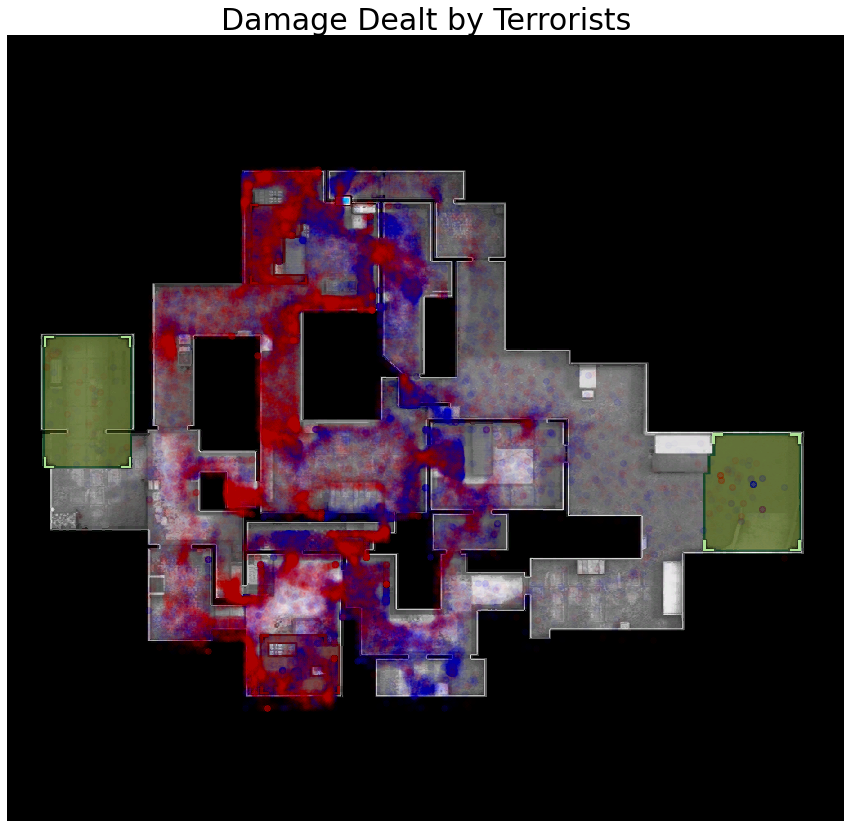

In [231]:
map_input = "de_cache"
bg = imread(f'data/maps/{map_input}.png')

#select all games from Cache and create matching dataframe
plot_df = df.loc[(df.map == map_input) & (df.att_side == 'Terrorist')] 

#find map coordinate data from map dataframe
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create matplotplib graph and overlay over background image
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.01, c='blue')
plt.scatter(plot_df['vic_pos_x'] + 25, plot_df['vic_pos_y'], alpha=.01, c='red')
plt.title(f'Damage Dealt by Terrorists', fontsize=30)
plt.axis('off')
plt.show()

From this, we can see clear trends in where the terrorists and counter-terrorists are attacking each other. The distribution of terrorists on the right and counter-terrorists on the left (where they spawn, respectively) is very clear, and commong Counter-Terrorist defensive positions appear as large red masses, as this is where they are being attacked by terrorists.

We can now look again at the exact same data, but this time restricted to only players using the 'AWP', a powerful sniper.

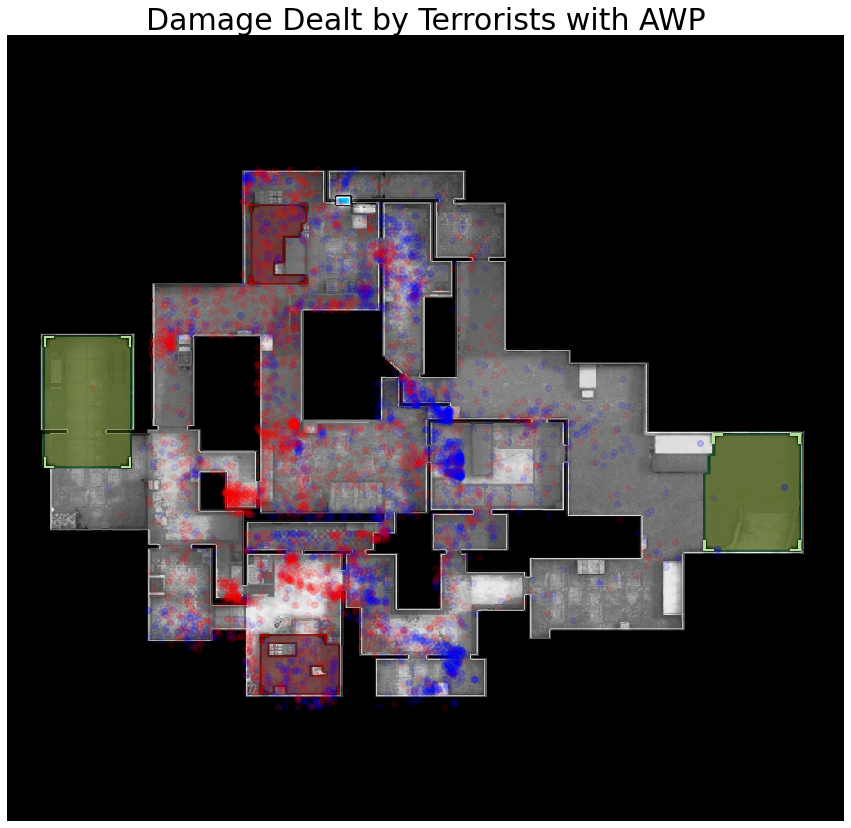

In [232]:
map_input = "de_cache"
bg = imread(f'data/maps/{map_input}.png')

#select all games from cache with AWP and create matching dataframe
plot_df = df.loc[(df.map == map_input) & (df.att_side == 'Terrorist') & (df.wp == 'AWP')] 

#find map coordinate data from map dataframe
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create matplotplib graph and overlay over background image
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.1, c='blue')
plt.scatter(plot_df['vic_pos_x'] + 25, plot_df['vic_pos_y'], alpha=.1, c='red')
plt.title(f'Damage Dealt by Terrorists with AWP', fontsize=30)
plt.axis('off')
plt.show()

We can see that the range of engagement is much longer here than in our previous map, with the distance between clusters of players dealing/receiving damage being much greater. Similar yet opposite trends can be seen when selecting for short range weapons like shotguns. 

Next, we can use a similar positional analysis technique to analyze how players use their grenades within a match, specifically how they use smoke grenades. Smoke grenades provide an opaque wall of smoke that Terrorists will use to block Counter-Terrorist sightlines when attacking and Counter-Terrorists will use to prevent their enemies from moving into a bombsite. The thrower of each smoke grenade is represented in **red**, while the landing spot of each smoke grenade is represented in **blue**.

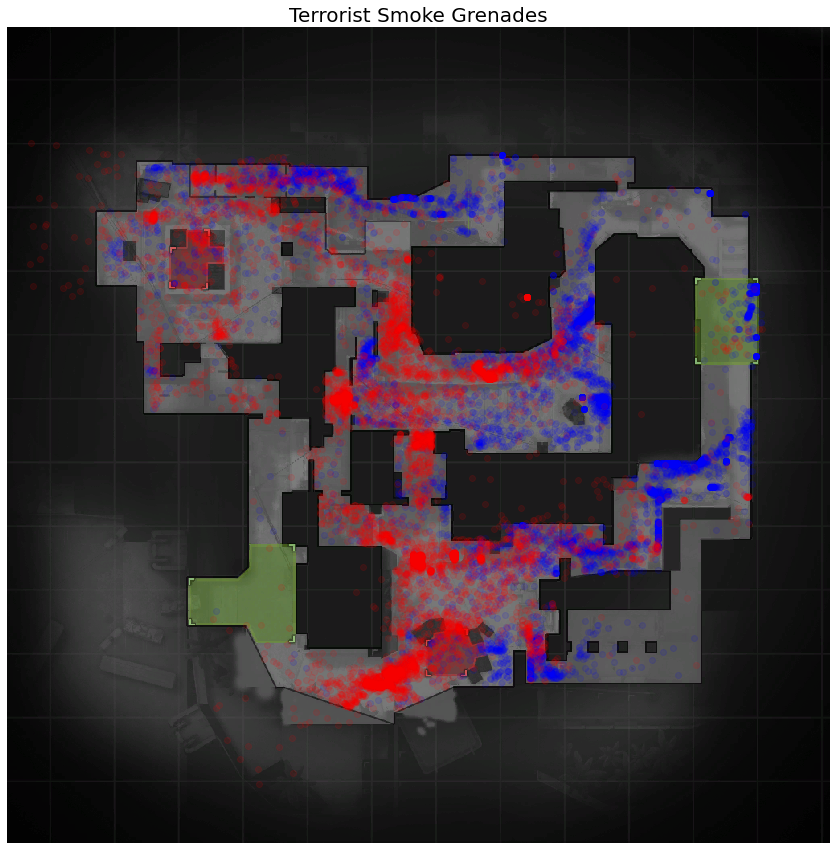

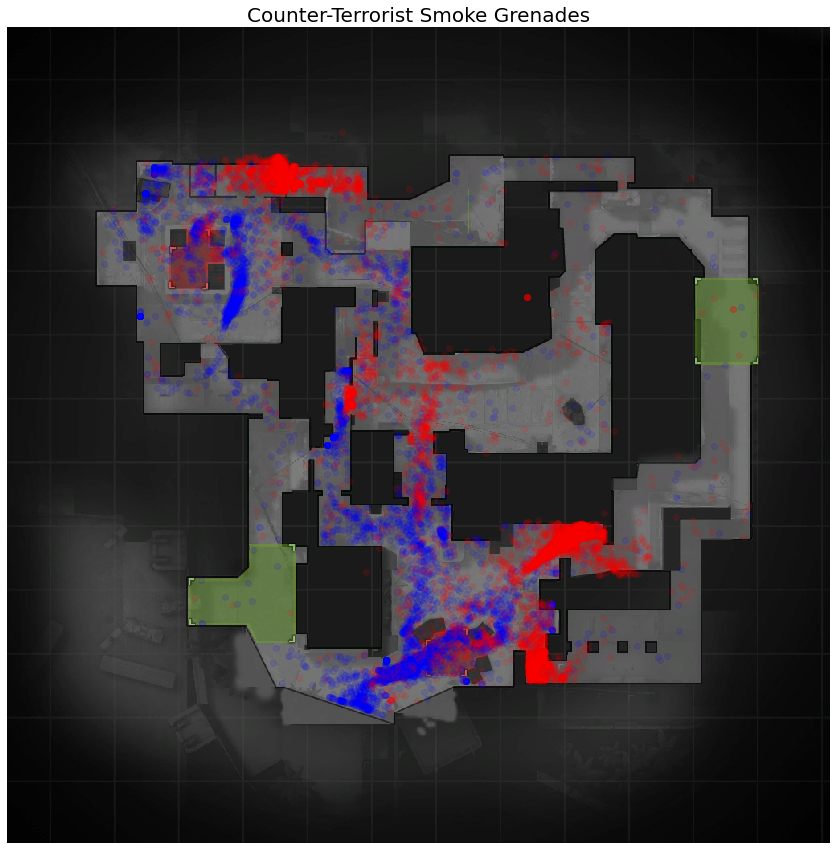

In [233]:
map_input = "de_mirage"

#create plot dataframe
plot_df = grenadedf.loc[(grenadedf.nade == 'Smoke') & (grenadedf.map == map_input) & (grenadedf.att_side == 'Terrorist')] 
bg = imread(f'data/maps/{map_input}.png')

#fetch map data
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create plot and display background
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.1, c='blue')
plt.scatter(plot_df['nade_land_x'] + 25, plot_df['nade_land_y'], alpha=.11, c='red')
plt.title(f'Terrorist Smoke Grenades', fontsize=20)
plt.axis('off')
plt.show()

#create plot dataframe
plot_df = grenadedf.loc[(grenadedf.nade == 'Smoke') & (grenadedf.map == map_input) & (grenadedf.att_side == 'CounterTerrorist')] 
bg = imread(f'data/maps/{map_input}.png')

#fetch map data
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create plot and display background
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.1, c='blue')
plt.scatter(plot_df['nade_land_x'] + 25, plot_df['nade_land_y'], alpha=.11, c='red')
plt.title(f'Counter-Terrorist Smoke Grenades', fontsize=20)
plt.axis('off')
plt.show()

As we can see, the terrorists (right side spawn) have a tendency their grenades from between their spawn A site (bottom center) and cut off the line of sight between their attack position and Counter-Terrorist spawn. A similar trend can be seen at site B (top left), though less well defined.

The Counter Terrorists, on the other hand, tend to throw the majority of their smokes at the choke points where the Terrorists pass through while trying to reach the bomb sites.

While the clusters are noticeable, it is also clear that the smoke grenades do not all land in their exact intended spot. We can select for only matches where the average player rank was above a certain threshold and see how that changes the outcome.

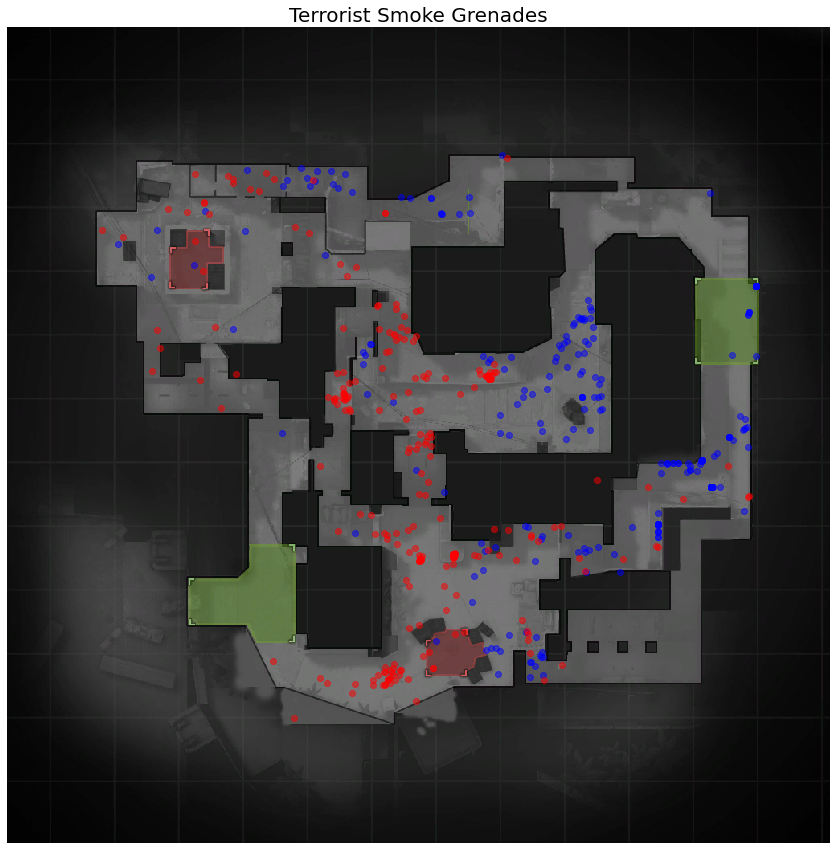

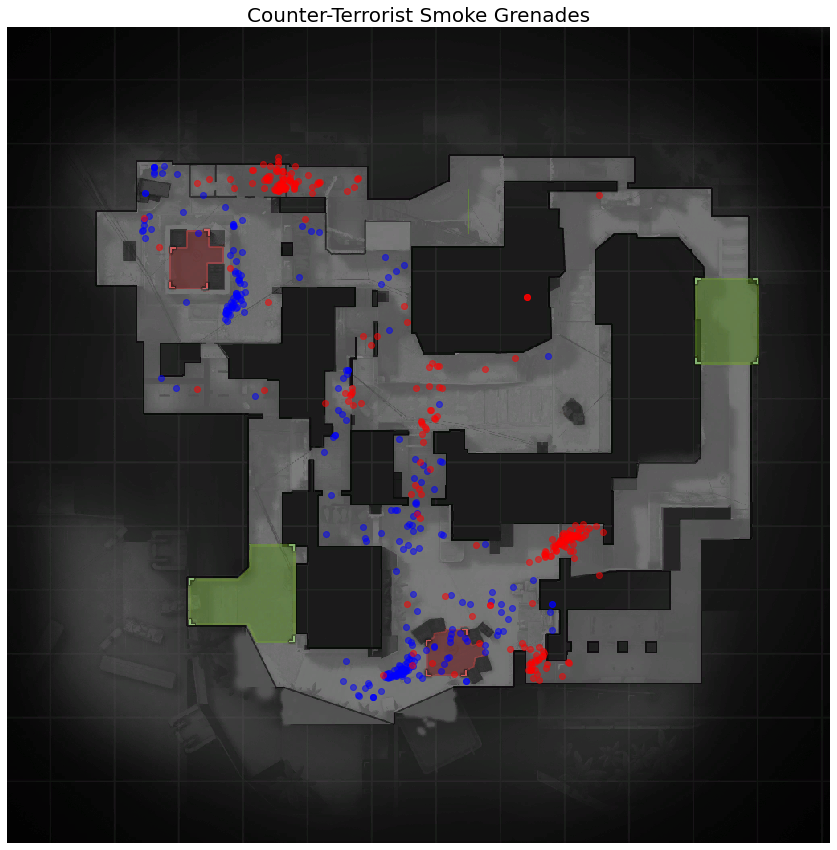

In [234]:
map_input = "de_mirage"

#create plot dataframe
plot_df = grenadedf.loc[(grenadedf.nade == 'Smoke') & (grenadedf.map == map_input) & (grenadedf.att_side == 'Terrorist') & (grenadedf.avg_match_rank > 15)] 
bg = imread(f'data/maps/{map_input}.png')

#fetch map data
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create plot and display background
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.5, c='blue')
plt.scatter(plot_df['nade_land_x'] + 25, plot_df['nade_land_y'], alpha=.5, c='red')
plt.title(f'Terrorist Smoke Grenades', fontsize=20)
plt.axis('off')
plt.show()

#create plot dataframe
plot_df = grenadedf.loc[(grenadedf.nade == 'Smoke') & (grenadedf.map == map_input) & (grenadedf.att_side == 'CounterTerrorist') & (grenadedf.avg_match_rank > 15)] 
bg = imread(f'data/maps/{map_input}.png')

#fetch map data
map_data = mapdf.loc[mapdf.map == map_input]
coords = [map_data.StartX.sum(), map_data.EndX.sum(), map_data.StartY.sum(), map_data.EndY.sum()]

#create plot and display background
plt.figure(figsize=(15, 15))
plt.imshow(bg, aspect = 'equal', interpolation = 'none', extent = coords)
plt.scatter(plot_df['att_pos_x'] + 25, plot_df['att_pos_y'], alpha=.5, c='blue')
plt.scatter(plot_df['nade_land_x'] + 25, plot_df['nade_land_y'], alpha=.5, c='red')
plt.title(f'Counter-Terrorist Smoke Grenades', fontsize=20)
plt.axis('off')
plt.show()

Here we can see the same data as before, but with much less variance in the positions. It is clear that these higher-ranked players have more experience and are more consistent in throwing accurate smoke grenades. We can also see that these higher-rank players appear to not use smoke grenades when attacking B very often relative to the general populace. Presenting the data like this can be valuable in finding insight into strategies that you may not be aware of.

In [235]:
grouped = df.groupby(['match_no', 'round'])
match_nos = []
count = 0
for group in grouped.groups:
  if group[0] not in match_nos:
    match_nos.append(group[0])
    count += 1

count



1297